# Ejercicio 1: Introducción a Recuperación de Información

## Nombre: Michael Perugachi          Grupo: GR1CC

## Objetivo de la práctica
- Entender el problema de **buscar información** en colecciones de texto.
- Comprender por qué se necesita un **índice invertido** en recuperación de información.
- Programar una primera solución manual y luego optimizarla con un índice.
- Evaluar la mejora en tiempos de búsqueda cuando usamos estructuras adecuadas.

## Parte 1: Búsqueda lineal en documentos

### Actividad
1. Se te proporcionará un dataset con reviews de películas.
2. Escribe una función que:
   - Lea todos los documentos.
   - Busque una palabra ingresada por el usuario.
   - Muestre en qué documentos aparece la palabra.

In [11]:
import pandas as pd

In [13]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [14]:
def buscar_palabra(df, palabra):
    palabra = palabra.lower()
    indices_encontrados = []

    # Recorrer todas las reseñas del DataFrame
    for i, texto in enumerate(df['review']):
        if palabra in texto.lower():
            indices_encontrados.append(i)

    # Mostrar resultados
    if indices_encontrados:
        print(f"La palabra '{palabra}' aparece en los siguientes documentos:")
        print(indices_encontrados)
        print(f"Total: {len(indices_encontrados)} documentos encontrados.")
    else:
        print(f"La palabra '{palabra}' no aparece en ningún documento.")

    return indices_encontrados

palabra = input("Ingresa la palabra a buscar: ")
docs_encontrados = buscar_palabra(df, palabra)

Ingresa la palabra a buscar:  Ecuador


La palabra 'ecuador' aparece en los siguientes documentos:
[24671, 44519]
Total: 2 documentos encontrados.


## Parte 2: Construcción de un índice invertido

### Actividad
1. Escribe un programa que:
   - Recorra todos los documentos.
   - Construya un **índice invertido**, es decir, un diccionario donde:
     - Cada palabra clave apunta a una lista de documentos donde aparece.

2. Escribe una nueva función de búsqueda que:
   - Consulte directamente el índice para encontrar los documentos relevantes.
   - Sea mucho más rápida que la búsqueda lineal.

In [15]:
def construir_indice_invertido(df):
    indice_invertido = {}

    for i, texto in enumerate(df['review']):
        # Dividir el texto en palabras
        palabras = texto.lower().split()

        for palabra in palabras:
            # Quitar signos de puntuación básicos
            palabra = palabra.strip('.,!?()[]{}":;')

            # Si la palabra no está en el índice, agregarla
            if palabra not in indice_invertido:
                indice_invertido[palabra] = set()  # usamos set para evitar duplicados

            # Agregar el índice del documento donde aparece
            indice_invertido[palabra].add(i)

    # Convertir los sets a listas para uso posterior
    for palabra in indice_invertido:
        indice_invertido[palabra] = list(indice_invertido[palabra])

    return indice_invertido


# Construcción del índice
indice_invertido = construir_indice_invertido(df)
print("Índice invertido construido con éxito.")
print(f"Total de palabras en el índice: {len(indice_invertido)}")


Índice invertido construido con éxito.
Total de palabras en el índice: 227838


In [17]:
def buscar_en_indice(indice_invertido, palabra):
    palabra = palabra.lower().strip('.,!?()[]{}":;')

    if palabra in indice_invertido:
        documentos = indice_invertido[palabra]
        print(f"La palabra '{palabra}' aparece en los siguientes documentos:")
        print(documentos)
        print(f"Total: {len(documentos)} documentos encontrados.")
        return documentos
    else:
        print(f"La palabra '{palabra}' no aparece en ningún documento.")
        return []


In [21]:
palabra = input("Ingresa la palabra a buscar: ")
docs_encontrados = buscar_en_indice(indice_invertido, palabra)

Ingresa la palabra a buscar:  Ecuador


La palabra 'ecuador' aparece en los siguientes documentos:
[44519, 24671]
Total: 2 documentos encontrados.


## Parte 3: Evaluación de tiempos de búsqueda
### Actividad

1. Realiza la búsqueda de varias palabras usando:
      -  Corpus pequeño.
      -  Corpus grande.
2. Mide el tiempo de ejecución:
      -  Para búsqueda lineal.
      -  Para búsqueda usando índice invertido.
      -  Grafica o presenta los resultados en una tabla comparativa.

In [39]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [40]:

df_grande = pd.read_csv('/kaggle/input/rotten-tomato-movie-reviews-1-44m-rows/rotten_tomatoes_movie_reviews.csv')
df_grande

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
...,...,...,...,...,...,...,...,...,...,...,...
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...



--- Cargando Corpus Pequeño (IMDB) ---
Corpus Pequeño cargado. Total: 50000 documentos.
⏱ Tiempo construcción índice: 6.0049 segundos

--- Cargando Corpus Grande (Rotten Tomatoes) ---
Corpus Grande cargado. Total: 1444963 documentos.
Procesadas 100000 reseñas...
Procesadas 200000 reseñas...
Procesadas 300000 reseñas...
Procesadas 400000 reseñas...
Procesadas 500000 reseñas...
Procesadas 600000 reseñas...
Procesadas 700000 reseñas...
Procesadas 800000 reseñas...
Procesadas 900000 reseñas...
Procesadas 1000000 reseñas...
Procesadas 1100000 reseñas...
Procesadas 1200000 reseñas...
Procesadas 1300000 reseñas...
Procesadas 1400000 reseñas...
⏱ Tiempo construcción índice: 21.0105 segundos

*** COMPARANDO TIEMPOS EN CORPUS PEQUEÑO ***

--- TABLA DE RESULTADOS: CORPUS PEQUEÑO ---
| Palabra     |   Lineal (s) |   Índice (s) |   Mejora (x) |
|:------------|-------------:|-------------:|-------------:|
| movie       |     0.191462 |     0.000690 |   277.679461 |
| bad         |     0.193431 |   

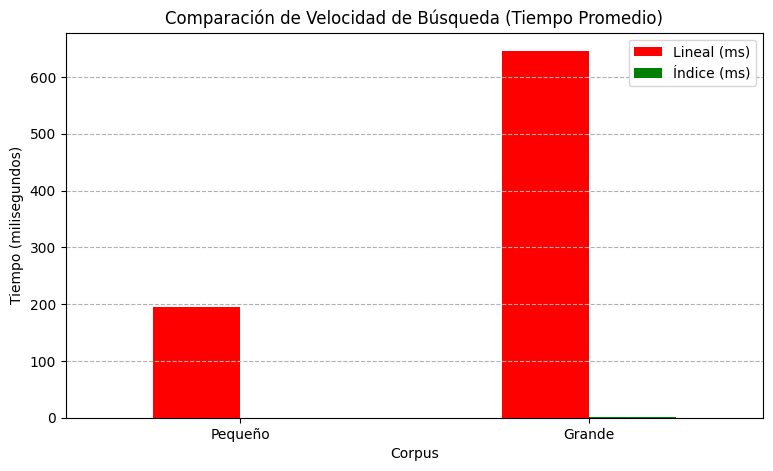

In [50]:
import pandas as pd
import os
import time
import kagglehub
import matplotlib.pyplot as plt

# ============================
# FUNCIONES AUXILIARES
# ============================

def buscar_lineal(df, palabra):
    """Búsqueda lineal en todas las reseñas del DataFrame."""
    palabra = palabra.lower()
    inicio = time.time()
    indices_encontrados = []
    
    for i, texto in enumerate(df['review']):
        if palabra in texto.lower():
            indices_encontrados.append(i)
    
    fin = time.time()
    t_total = fin - inicio
    return indices_encontrados, t_total


def crear_indice_invertido(df, columna):
    """Crea un índice invertido para búsqueda eficiente."""
    inicio = time.time()
    
    # Evitar valores nulos y convertir todo a texto
    df = df.copy()
    df[columna] = df[columna].fillna("").astype(str)
    
    indice = {}
    for i, texto in enumerate(df[columna]):
        palabras = texto.lower().split()
        for palabra in palabras:
            palabra = palabra.strip('.,!?()[]{}":;')
            if palabra:
                if palabra not in indice:
                    indice[palabra] = set()
                indice[palabra].add(i)
        
        # Mostrar avance cada 100k reseñas (solo informativo)
        if i % 100000 == 0 and i > 0:
            print(f"Procesadas {i} reseñas...")

    fin = time.time()
    print(f"⏱ Tiempo construcción índice: {fin - inicio:.4f} segundos")
    return indice


def buscar_con_indice(indice, palabra, df):
    """Búsqueda usando el índice invertido."""
    palabra = palabra.lower()
    inicio = time.time()
    resultados = list(indice.get(palabra, []))
    fin = time.time()
    t_total = fin - inicio
    return resultados, t_total


def comparar_tiempos(df_corpus, indice, es_grande=False):
    """Ejecuta y mide ambas búsquedas para varias palabras."""
    
    nombre = "GRANDE" if es_grande else "PEQUEÑO"
    print(f"\n*** COMPARANDO TIEMPOS EN CORPUS {nombre} ***")
    
    palabras = ['movie', 'bad', 'excellent', 'nonsense', 'holographic']
    
    tiempos_data = []
    
    for palabra in palabras:
        # Medición Lineal
        _, t_lineal = buscar_lineal(df_corpus, palabra)
        
        # Medición con Índice
        _, t_indice = buscar_con_indice(indice, palabra, df_corpus)
        
        mejora = t_lineal / t_indice if t_indice > 0 else 0
        
        tiempos_data.append({
            'Palabra': palabra,
            'Lineal (s)': t_lineal,
            'Índice (s)': t_indice,
            'Mejora (x)': mejora
        })
        
    return pd.DataFrame(tiempos_data)


# ============================
# CARGA DE CORPUS PEQUEÑO
# ============================

print("\n--- Cargando Corpus Pequeño (IMDB) ---")
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df = df.rename(columns={'review': 'review'})  # asegurar nombre correcto
df['review'] = df['review'].fillna("").astype(str)
print(f"Corpus Pequeño cargado. Total: {len(df)} documentos.")

# Crear índice para el corpus pequeño
indice_pequeño = crear_indice_invertido(df, 'review')


# ============================
# CARGA DE CORPUS GRANDE
# ============================

print("\n--- Cargando Corpus Grande (Rotten Tomatoes) ---")
try:
    path_large = kagglehub.dataset_download("andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews")
    ruta_csv_large = os.path.join(path_large, 'rotten_tomatoes_movie_reviews.csv')
    df_large = pd.read_csv(ruta_csv_large)
    
    # Renombrar columna y limpiar
    df_large = df_large.rename(columns={'reviewText': 'review'})
    df_large['review'] = df_large['review'].fillna("").astype(str)
    print(f"Corpus Grande cargado. Total: {len(df_large)} documentos.")
    
    indice_grande = crear_indice_invertido(df_large, 'review')
    corpus_grande_disponible = True
except Exception as e:
    print(f"No se pudo cargar el Corpus Grande. Razón: {e}")
    corpus_grande_disponible = False


# ============================
# EVALUACIÓN DE TIEMPOS
# ============================

# Corpus pequeño
df_tiempos_pequeño = comparar_tiempos(df, indice_pequeño, es_grande=False)
print("\n--- TABLA DE RESULTADOS: CORPUS PEQUEÑO ---")
print(df_tiempos_pequeño.to_markdown(index=False, floatfmt=".6f"))


# Corpus grande
if corpus_grande_disponible:
    df_tiempos_grande = comparar_tiempos(df_large, indice_grande, es_grande=True)
    print("\n--- TABLA DE RESULTADOS: CORPUS GRANDE ---")
    print(df_tiempos_grande.to_markdown(index=False, floatfmt=".6f"))

    # ============================
    # GRÁFICO COMPARATIVO
    # ============================
    df_plot = pd.DataFrame({
        'Corpus': ['Pequeño', 'Grande'],
        'Lineal (ms)': [
            df_tiempos_pequeño['Lineal (s)'].mean() * 1000,
            df_tiempos_grande['Lineal (s)'].mean() * 1000,
        ],
        'Índice (ms)': [
            df_tiempos_pequeño['Índice (s)'].mean() * 1000,
            df_tiempos_grande['Índice (s)'].mean() * 1000,
        ]
    }).set_index('Corpus')

    df_plot.plot(kind='bar', figsize=(9, 5), color=['red', 'green'])
    plt.title('Comparación de Velocidad de Búsqueda (Tiempo Promedio)')
    plt.ylabel('Tiempo (milisegundos)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()